# Bag of Words

## Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
import wandb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from utils.evaluationUtility import evaluate_model, evaluate_classifier, analyze_all_results

In [3]:
IS_PAPERSPACE = os.getcwd().startswith('/notebooks')
dir_env = os.path.join(os.getcwd(), '.env') if IS_PAPERSPACE else os.path.join(os.getcwd(), '..', '.env')
_ = load_dotenv(dotenv_path=dir_env)

In [4]:
wandb.login(key=os.getenv('WANDB_KEY'))
wandb._disable_jupyter = True

wandb: Currently logged in as: dario-wigger (nlp-lantsch-schmassmann-wigger). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Data

In [5]:
df_traindata = pd.read_csv("data/train.csv") if IS_PAPERSPACE else pd.read_csv("../data/train.csv")

train_texts, validation_texts, train_labels, validation_labels = train_test_split(
    df_traindata['text'].tolist(), 
    df_traindata['sentiment'].tolist(), 
    test_size=0.2, 
    random_state=42
)

df_testdata = pd.read_csv("data/test.csv") if IS_PAPERSPACE else pd.read_csv("../data/test.csv")
test_texts = df_testdata['text'].tolist()
test_labels = df_testdata['sentiment'].tolist()

## Vectorization
Creation of a Bag-of-Words Matrix

In [6]:
countVectorizer = CountVectorizer(stop_words='english', max_features=10000)
tfidfVectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

## Baseline

### Training
Training a Naive Bayes Classifier

In [7]:
model = make_pipeline(countVectorizer, MultinomialNB())

In [8]:
model.fit(train_texts, train_labels)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

### Evaluation on Validation Set

In [9]:
val_preds = model.predict(validation_texts)

print("Validation Accuracy:", accuracy_score(validation_labels, val_preds))
print(classification_report(validation_labels, val_preds))

Validation Accuracy: 0.7616322675629879
              precision    recall  f1-score   support

           0       0.72      0.71      0.71     15109
           1       0.79      0.80      0.80     20890

    accuracy                           0.76     35999
   macro avg       0.76      0.75      0.75     35999
weighted avg       0.76      0.76      0.76     35999



### Evaluation on Test Set

In [10]:
evaluate_model(model, test_texts, test_labels)

f1,▁
precision,▁
recall,▁
f1,0.75989
precision,0.75963
recall,0.76031


(0.7596287211850455, 0.7603057845729905, 0.7598881495992807)

## Classifier Comparison
Comparison of different classifiers

### Naive Bayes

In [12]:
evaluate_classifier(
    classifier=MultinomialNB(), 
    classifier_name="MultinomialNB", 
    vectorizer=countVectorizer, 
    vectorizer_name="CountVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")


Classifier: MultinomialNB | Vectorizer: CountVectorizer
Validation Accuracy: 0.7616
Test Accuracy: 0.7603
Training Duration: 2.39 seconds


f1,▁
precision,▁
recall,▁
f1,0.75989
precision,0.75963
recall,0.76031


In [13]:
evaluate_classifier(
    classifier=MultinomialNB(), 
    classifier_name="MultinomialNB", 
    vectorizer=tfidfVectorizer, 
    vectorizer_name="TfidfVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")


Classifier: MultinomialNB | Vectorizer: TfidfVectorizer
Validation Accuracy: 0.7574
Test Accuracy: 0.7577
Training Duration: 2.19 seconds


f1,▁
precision,▁
recall,▁
f1,0.75333
precision,0.75768
recall,0.75768


### Logistic Regression

In [14]:
evaluate_classifier(
    classifier=LogisticRegression(max_iter=1000), 
    classifier_name="LogisticRegression", 
    vectorizer=countVectorizer, 
    vectorizer_name="CountVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")


Classifier: LogisticRegression | Vectorizer: CountVectorizer
Validation Accuracy: 0.7669
Test Accuracy: 0.7654
Training Duration: 9.22 seconds


f1,▁
precision,▁
recall,▁
f1,0.76253
precision,0.76441
recall,0.76535


In [15]:
evaluate_classifier(
    classifier=LogisticRegression(max_iter=1000), 
    classifier_name="LogisticRegression", 
    vectorizer=tfidfVectorizer, 
    vectorizer_name="TfidfVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")


Classifier: LogisticRegression | Vectorizer: TfidfVectorizer
Validation Accuracy: 0.7697
Test Accuracy: 0.7683
Training Duration: 5.34 seconds


f1,▁
precision,▁
recall,▁
f1,0.76559
precision,0.76738
recall,0.76828


### Linear SVM

In [16]:
evaluate_classifier(
    classifier=LinearSVC(), 
    classifier_name="LinearSVC", 
    vectorizer=countVectorizer, 
    vectorizer_name="CountVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Classifier: LinearSVC | Vectorizer: CountVectorizer
Validation Accuracy: 0.7607
Test Accuracy: 0.7609
Training Duration: 40.05 seconds


f1,▁
precision,▁
recall,▁
f1,0.75807
precision,0.75974
recall,0.76086


In [17]:
evaluate_classifier(
    classifier=LinearSVC(), 
    classifier_name="LinearSVC", 
    vectorizer=tfidfVectorizer, 
    vectorizer_name="TfidfVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Classifier: LinearSVC | Vectorizer: TfidfVectorizer
Validation Accuracy: 0.7609
Test Accuracy: 0.7633
Training Duration: 4.39 seconds


f1,▁
precision,▁
recall,▁
f1,0.76105
precision,0.76199
recall,0.76328


### XGBoost

In [18]:
evaluate_classifier(
    classifier=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    classifier_name="XGBoost", 
    vectorizer=countVectorizer, 
    vectorizer_name="CountVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Classifier: XGBoost | Vectorizer: CountVectorizer
Validation Accuracy: 0.7400
Test Accuracy: 0.7360
Training Duration: 22.81 seconds


f1,▁
precision,▁
recall,▁
f1,0.72505
precision,0.74267
recall,0.73602


In [19]:
evaluate_classifier(
    classifier=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    classifier_name="XGBoost", 
    vectorizer=tfidfVectorizer, 
    vectorizer_name="TfidfVectorizer", 
    train_texts=train_texts,
    train_labels=train_labels,
    validation_texts=validation_texts,
    validation_labels=validation_labels,
    test_texts=test_texts,
    test_labels=test_labels,
    model_name="bagOfWords")

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Classifier: XGBoost | Vectorizer: TfidfVectorizer
Validation Accuracy: 0.7394
Test Accuracy: 0.7367
Training Duration: 17.19 seconds


f1,▁
precision,▁
recall,▁
f1,0.72575
precision,0.74361
recall,0.73675


## Results Analysis

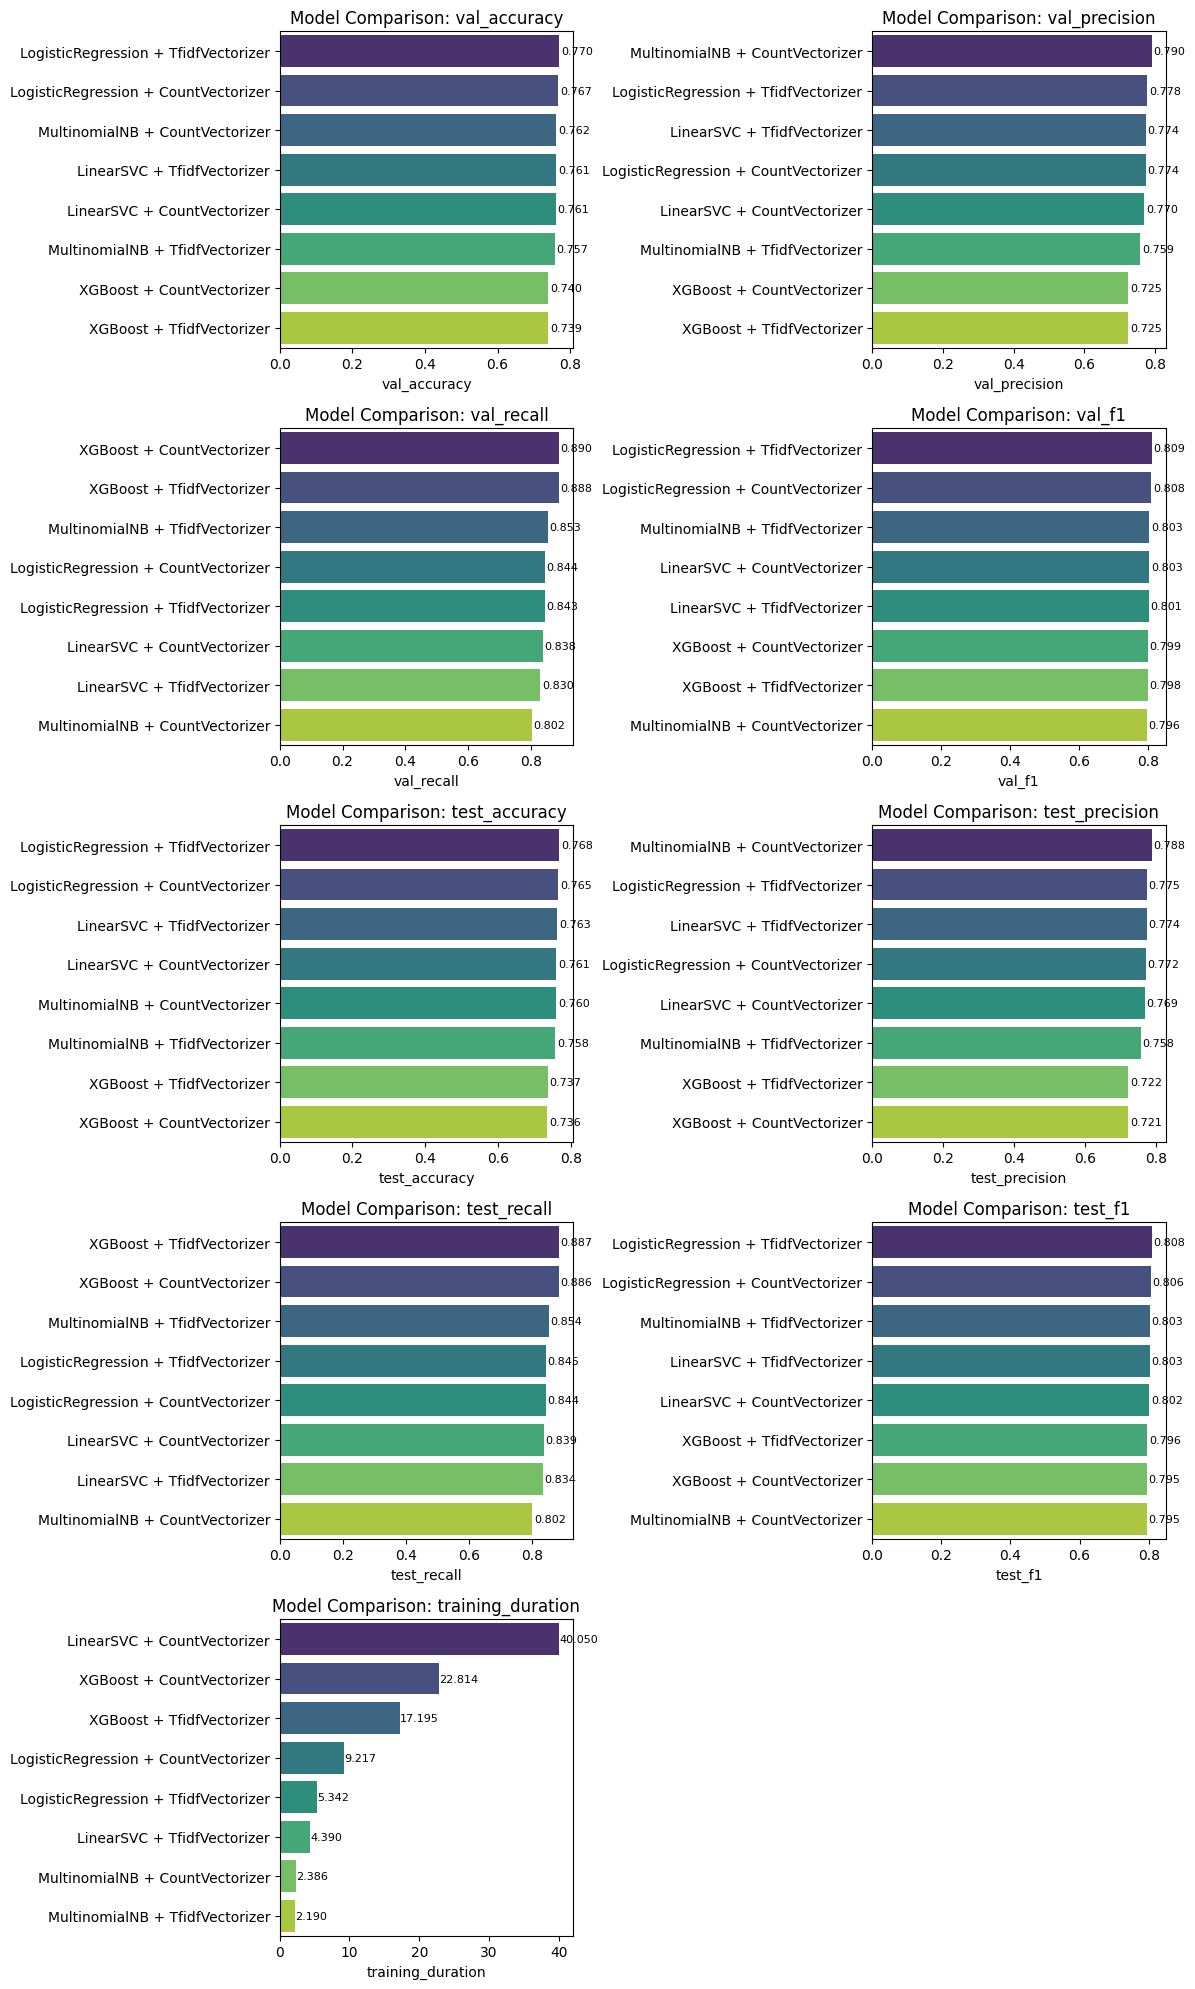

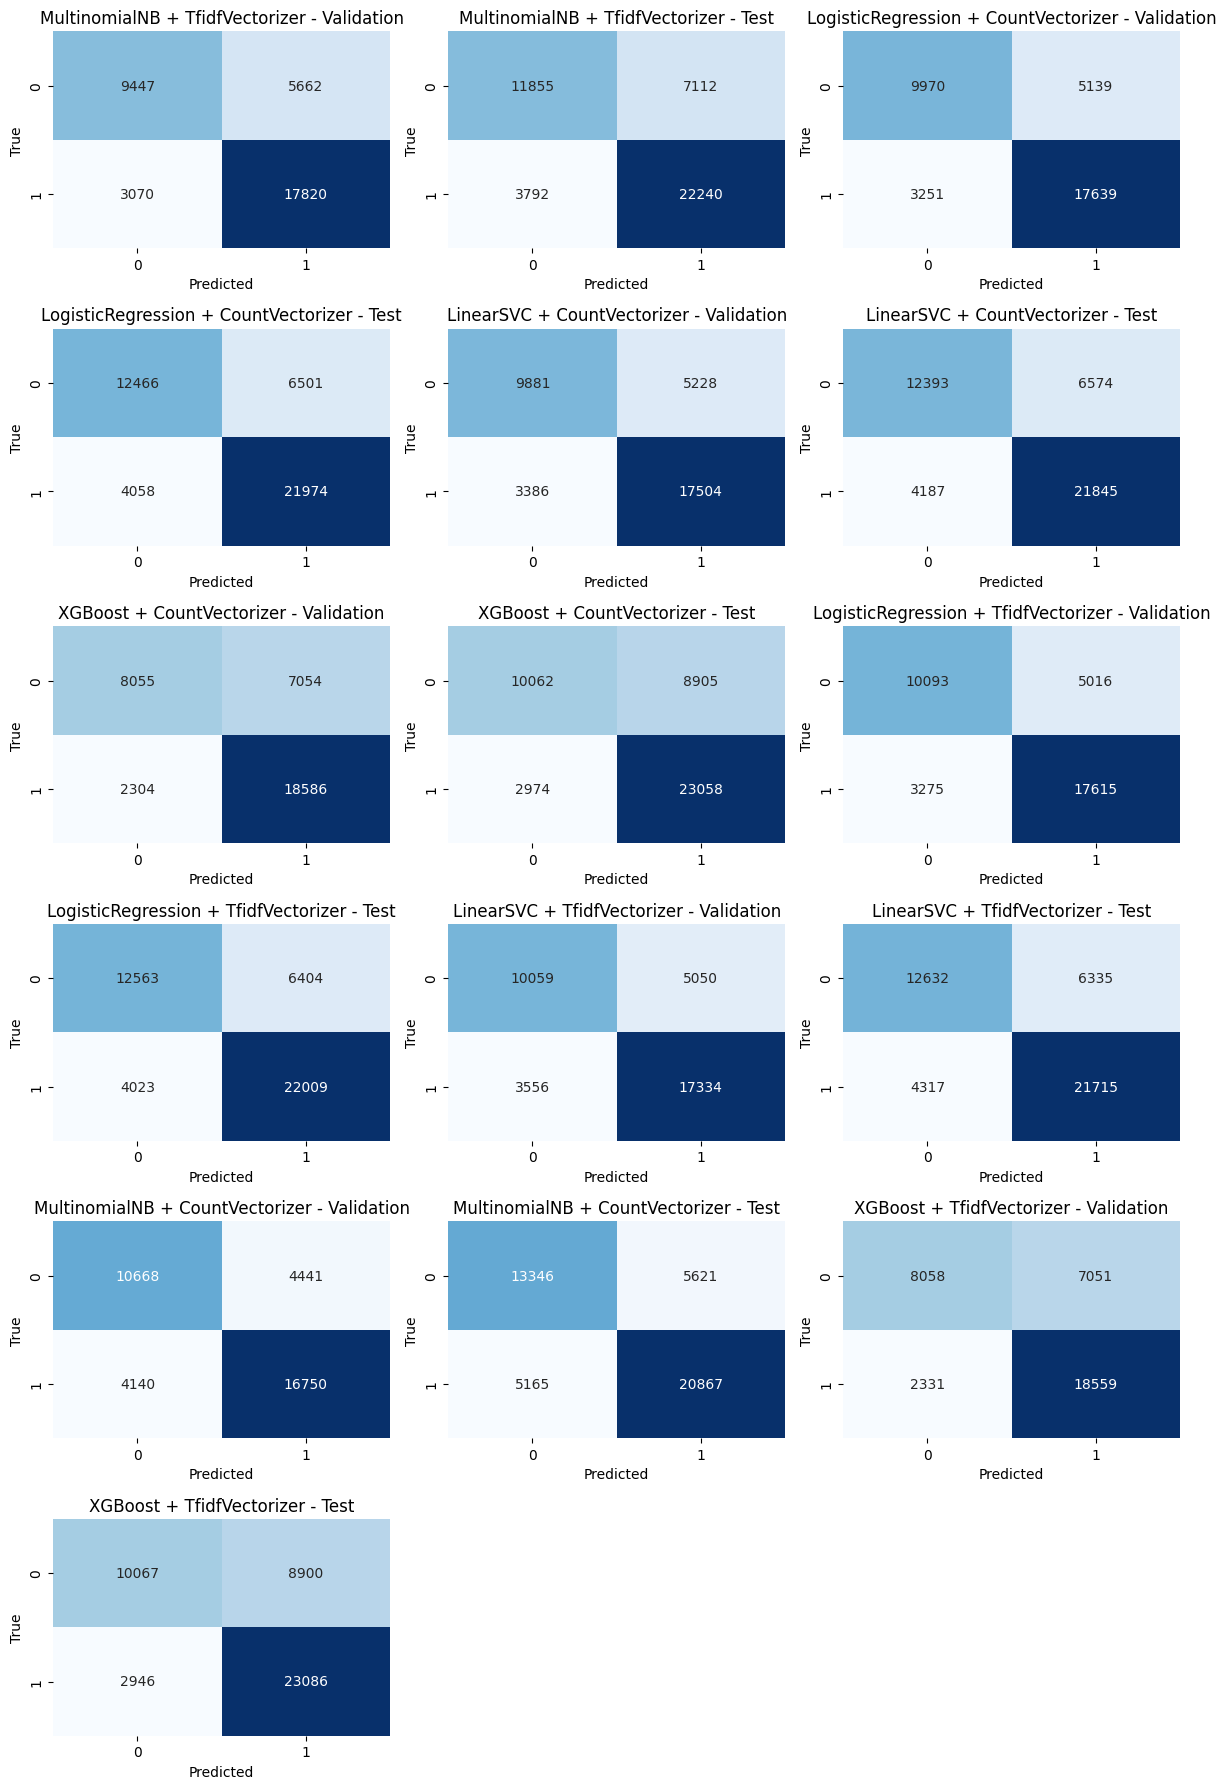

,classifier,vectorizer,val_accuracy,val_precision,val_recall,val_f1,test_accuracy,test_precision,test_recall,test_f1,training_duration,Classifier,Vectorizer,Validation Confusion,Test Confusion,Model
0,MultinomialNB,TfidfVectorizer,0.757438,0.758879,0.853040,0.803209,0.757684,0.757700,0.854333,0.803120,2.190213,MultinomialNB,TfidfVectorizer,"[[9447, 5662], [3070, 17820]]","[[11855, 7112], [3792, 22240]]",MultinomialNB + TfidfVectorizer
1,LogisticRegression,CountVectorizer,0.766938,0.774388,0.844375,0.807868,0.765350,0.771694,0.844115,0.806282,9.216810,LogisticRegression,CountVectorizer,"[[9970, 5139], [3251, 17639]]","[[12466, 6501], [4058, 21974]]",LogisticRegression + CountVectorizer
2,LinearSVC,CountVectorizer,0.760716,0.770016,0.837913,0.802531,0.760861,0.768676,0.839159,0.802373,40.049560,LinearSVC,CountVectorizer,"[[9881, 5228], [3386, 17504]]","[[12393, 6574], [4187, 21845]]",LinearSVC + CountVectorizer
3,XGBoost,CountVectorizer,0.740048,0.724883,0.889708,0.798882,0.736016,0.721397,0.885756,0.795172,22.813843,XGBoost,CountVectorizer,"[[8055, 7054], [2304, 18586]]","[[10062, 8905], [2974, 23058]]",XGBoost + CountVectorizer
4,LogisticRegression,TfidfVectorizer,0.769688,0.778357,0.843226,0.809494,0.768284,0.774610,0.845459,0.808486,5.341659,LogisticRegression,TfidfVectorizer,"[[10093, 5016], [3275, 17615]]","[[12563, 6404], [4023, 22009]]",LogisticRegression + TfidfVectorizer
5,LinearSVC,TfidfVectorizer,0.760938,0.774392,0.829775,0.801128,0.763284,0.774153,0.834166,0.803040,4.389709,LinearSVC,TfidfVectorizer,"[[10059, 5050], [3556, 17334]]","[[12632, 6335], [4317, 21715]]",LinearSVC + TfidfVectorizer
6,MultinomialNB,CountVectorizer,0.761632,0.790430,0.801819,0.796084,0.760306,0.787791,0.801590,0.794631,2.385592,MultinomialNB,CountVectorizer,"[[10668, 4441], [4140, 16750]]","[[13346, 5621], [5165, 20867]]",MultinomialNB + CountVectorizer
7,XGBoost,TfidfVectorizer,0.739382,0.724678,0.888416,0.798237,0.736750,0.721753,0.886832,0.795822,17.194914,XGBoost,TfidfVectorizer,"[[8058, 7051], [2331, 18559]]","[[10067, 8900], [2946, 23086]]",XGBoost + TfidfVectorizer


In [21]:
analyze_all_results(results_dir="executions/bagOfWords")